In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline
sns.set(rc={'figure.figsize':(10,5)})
plt.rcParams['figure.figsize']=10,5

In [6]:
train_sample_path = 'train_sample.csv'
train_path = 'train.csv'
test_path = 'test.csv'

In [4]:
train_sample_df = pd.read_csv(train_sample_path,na_values=('NA','na','null','NULL','Null'), encoding='utf-8')
train_df = pd.read_csv(train_path,na_values=('NA','na','null','NULL','Null'), encoding='utf-8')
test_submission = pd.read_csv(test_path,na_values=('NA','na','null','NULL','Null'), encoding='utf-8')

## Converting click time to click hour 

In [130]:
get_hour(train_sample_df,'click_time')
get_hour(train_df,'click_time')
get_hour(test_submission,'click_time')

In [171]:
def null_counter(df):
    for i in df.columns:
        print (i+' : '+str(len(df[i]) - df[i].count()))

def unique_counter(df):
    for i in df.columns:
        print (i+' : '+str(df[i].nunique()))

def get_hour(df, col):
    df[col] = df[col].apply(lambda x : pd.to_datetime(x))
    df[col] = df[col].apply(lambda x : x.hour)
    return df
    

## Train Sample 

In [241]:
train_sample_df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [7]:
train_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.9+ MB


In [8]:
train_sample_df.is_attributed.value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [40]:
print 'Number of unique values:'
unique_counter(train_sample_df)

Number of unique values:
ip : 34857
app : 161
device : 100
os : 130
channel : 161
click_time : 80350
attributed_time : 227
is_attributed : 2


In [221]:
train_sample_df.isnull().any()

ip                 False
app                False
device             False
os                 False
channel            False
click_time         False
attributed_time     True
is_attributed      False
dtype: bool

In [50]:
print 'Number of Null values:'
null_counter(train_sample_df)

Number of Null values:
ip : 0
app : 0
device : 0
os : 0
channel : 0
click_time : 0
attributed_time : 99773
is_attributed : 0


## Converting click time to click hour

C:\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


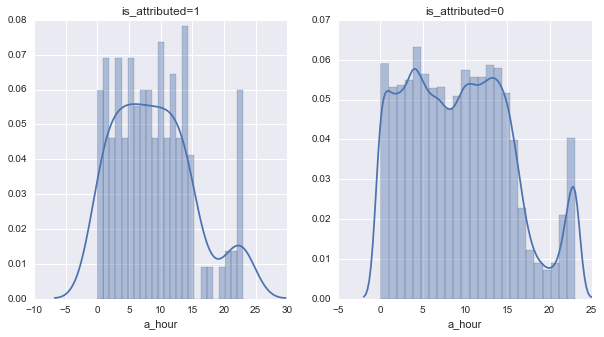

In [12]:
fig, ax =plt.subplots(1,2)
sns.distplot(train_sample_df[train_sample_df['is_attributed']==1]['a_hour'], bins =24, ax = ax[0] ).set_title('is_attributed=1')
ax = sns.distplot(train_sample_df[train_sample_df['is_attributed']==0]['a_hour'], bins =24, ax = ax[1] )
ax.set_title('is_attributed=0')
fig.show()

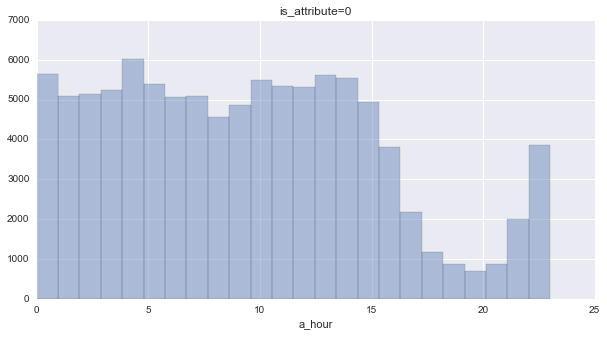

In [116]:
plt.figure()
plt.title('is_attribute=0')
sns.distplot(train_sample_df[train_sample_df['is_attributed']==0]['a_hour'], bins =24, kde = 0 )

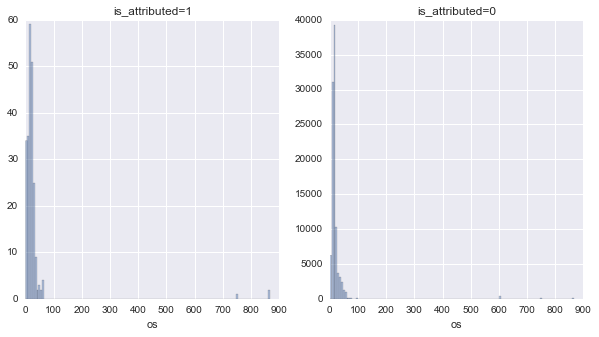

In [118]:
fig, ax =plt.subplots(1,2)
sns.distplot(train_sample_df[train_sample_df['is_attributed']==1]['os'], bins =131, ax = ax[0], kde = 0 ).set_title('is_attributed=1')
ax = sns.distplot(train_sample_df[train_sample_df['is_attributed']==0]['os'], bins =131, ax = ax[1], kde = 0 )
ax.set_title('is_attributed=0')
fig.show()

# Main data set

In [18]:
train_df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,a_hour
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,14
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,14
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,14
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,14
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,14


In [48]:
print 'Number of unique values:'
unique_counter(train_df)

Number of unique values:
ip : 277396
app : 706
device : 3475
os : 800
channel : 202
click_time : 259620
attributed_time : 182057
is_attributed : 2


In [49]:
print 'Number of Null values:'
null_counter(train_df)

Number of Null values:
ip : 0
app : 0
device : 0
os : 0
channel : 0
click_time : 0
attributed_time : 184447044
is_attributed : 0


### Hour distribution 

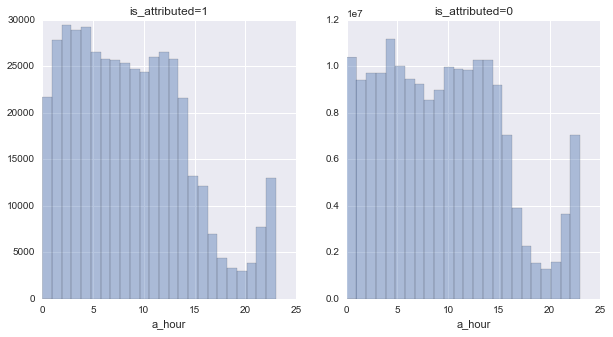

In [114]:
fig, ax =plt.subplots(1,2)
sns.distplot(train_df[train_df['is_attributed']==1]['a_hour'], bins =24, ax = ax[0], kde = 0 ).set_title('is_attributed=1')
ax = sns.distplot(train_df[train_df['is_attributed']==0]['a_hour'], bins =24, ax = ax[1], kde = 0 )
ax.set_title('is_attributed=0')
fig.show()

### OS distribution 

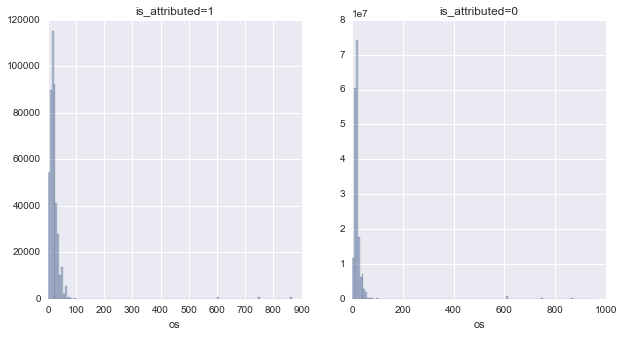

In [119]:
fig, ax =plt.subplots(1,2)
sns.distplot(train_df[train_df['is_attributed']==1]['os'], bins =131, ax = ax[0], kde = 0 ).set_title('is_attributed=1')
ax = sns.distplot(train_df[train_df['is_attributed']==0]['os'], bins =131, ax = ax[1], kde = 0 )
ax.set_title('is_attributed=0')
fig.show()

In [10]:
#df_os = pd.DataFrame()
df_os = pd.DataFrame(train_df['os'].value_counts()).reset_index()

In [11]:
df_os['all'] = sum(df_os['os'])

In [24]:
df_os.head()

,index,os,all,perc
0,19,44181914,184903890,23.894529
1,13,39782808,184903890,21.515398
2,17,9639776,184903890,5.213398
3,18,8974159,184903890,4.853418
4,22,7414405,184903890,4.009870


In [23]:
df_os['perc'] = (df_os['os']/df_os['all'])*100

In [25]:
sum(df_os[df_os['perc']<0.1]['perc'])

1.3000169980198981

In [26]:
train_df['os'].nunique(), len(train_df['os'])

(800, 184903890)

### IP

In [12]:
df_ip = pd.DataFrame(train_df['ip'].value_counts()).reset_index()
df_ip['all'] = sum(df_ip['ip'])
df_ip['perc'] = (df_ip['ip']/df_ip['all'])*100
sum(df_ip[df_ip['perc']<0.1]['perc'])

95.142991312786336

## Custom Transformations 

In [85]:
import scipy as sp
from sklearn.preprocessing import label_binarize, OneHotEncoder, LabelEncoder, MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
# imports for sklearn transformers
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, roc_auc_score, roc_curve
from sklearn.base import BaseEstimator, TransformerMixin

# imports for sklearn preprocessing transformers
from sklearn.preprocessing import *

# Feature extraction packages
from sklearn.feature_extraction import *
from sklearn.feature_extraction.text import *
from collections import defaultdict
from sklearn.pipeline import Pipeline, FeatureUnion

In [163]:
# class feature_transform(BaseEstimator, TransformerMixin):
    
#     def __init__(self,a,b):
#         self.a = a
#         self.b = b
    
#     def fit(self, x, y=None):
#         thresh = x[self.a].nunique()/len(x[self.a])
#         self.y = pd.DataFrame(x[self.a].value_counts()).reset_index()
#         self.y.columns = [self.a, 'count']
#         self.y['per_count'] = self.y['count']/sum(self.y['count'])
#         self.y[self.b] = self.y.apply(lambda X : 'default' if X['per_count']<thresh else X[self.a],axis=1)
# #        self.y = self.y.rename(columns={'index': self.a})
#         return self
#     def transform(self, z):
#         self.z_temp = pd.merge(z, self.y, how = 'left', on = self.a)
#         self.z_temp[self.a] = self.z_temp[self.b]
#         self.z_temp = self.z_temp.drop([self.b,'count','per_count'],axis=1)
#         z = pd.DataFrame(self.z_temp)
#         z[self.a]=z[self.a].astype('str')
#         return z

class feature_transform(BaseEstimator, TransformerMixin):
    
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self, x, y=None):
        self.y = pd.DataFrame()
        for c in self.cols:
            thresh = x[c].nunique()/len(x[c])
            self.y = pd.concat([self.y,pd.DataFrame(x[c].value_counts()).reset_index()],axis = 1)
            self.y = self.y.rename(columns={c:c+'_count','index':c})
            self.y[c+'_count'].fillna(0, inplace = True)
            self.y[c].fillna('nill', inplace = True)
            self.y[c+'_per_count'] = self.y[c+'_count']/sum(self.y[c+'_count'])
            self.y[c+'_2'] = self.y.apply(lambda X : 100000 if X[c+'_per_count']<thresh else X[c],axis=1)
        return self
    def transform(self, z):
        for c in self.cols:
            self.z_temp = pd.merge(z, self.y[[c,c+'_2']], how = 'left', on = c)
            self.z_temp.fillna(100000, inplace = True)
            self.z_temp[c] = self.z_temp[c+'_2']
            self.z_temp = self.z_temp.drop(c+'_2',axis=1)
            self.z_temp[c]=self.z_temp[c].astype('str')
            z = pd.DataFrame(self.z_temp)
            
        return z    

class DFsubsetSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols):
        self.cols = cols
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X[self.cols]
        
class getHour(BaseEstimator, TransformerMixin):
    
    def __init__(self, col):
        self.col = col
    
    def fit(self, X, y = None):
        return self
        
    def transform(self, X):
        #X['click_time'] = X['click_time'].apply(lambda x : pd.to_datetime(x))
        #X['click_time'] = X['click_time'].apply(lambda x : x.hour)
        X[self.col] = X[self.col].apply(lambda x : pd.to_datetime(x))
        X[self.col] = X[self.col].apply(lambda x : x.hour)
        return X
    
    

In [259]:
train_sample_df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [55]:
a = feature_transform(no_impute_features)
a.fit(train_revise)
test_check = a.transform(test_df)

In [66]:
test_check.device.value_counts()

1.0         942954
2.0          43727
0.0           5596
3032.0        3741
100000.0      2397
3543.0        1449
40.0            72
6.0             64
Name: device, dtype: int64

In [64]:
unique_counter(test_df)

ip : 81145
app : 276
device : 434
os : 204
channel : 171
click_time : 24
attributed_time : 2385
is_attributed : 2


In [13]:
train_df_2.device.nunique(), train_sample_df.device.nunique()

(19, 100)

In [118]:
device_transform.os.nunique(), train_sample_df.os.nunique()

(45, 130)

In [13]:
b = getHour('click_time')
df_click_transform = b.transform(train_df)
df_click_transform.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,a_hour
0,83230,3,1,13,379,14,NaN,0,14
1,17357,3,1,19,379,14,NaN,0,14
2,35810,3,1,13,379,14,NaN,0,14
3,45745,14,1,13,478,14,NaN,0,14
4,161007,3,1,13,379,14,NaN,0,14


In [99]:
train_sample_os = pd.DataFrame()
col = ['device','os','app']
for c in no_impute_features:
    thresh = (train_sample_df[c].nunique()/len(train_sample_df[c]))
#print thresh

    train_sample_os = pd.concat([train_sample_os,pd.DataFrame(train_sample_df[c].value_counts()).reset_index()],axis = 1)
    train_sample_os = train_sample_os.rename(columns={c:c+'_count','index':c})
    train_sample_os[c+'_count'].fillna(0, inplace = True)
    train_sample_os[c].fillna('nill', inplace = True)
#train_sample_os.head()
    train_sample_os[c+'_per_count'] = train_sample_os[c+'_count']/sum(train_sample_os[c+'_count'])
    train_sample_os[c+'_2'] = train_sample_os.apply(lambda x : 'tail' if x[c+'_per_count']<thresh else x[c],axis=1)

#train_sample_os['os2'].nunique()
#sum(train_sample_os.per_count)
#train_sample_df['os_contri'] = 

## Model

### Pipelines

In [161]:
features = ['app','device','os','channel','click_time']
no_impute_features = ['app','device','os','channel']
impute_feature = 'click_time'
target = ['is_attributed']

transform_list = Pipeline([("Selector", DFsubsetSelector(features)),
                           ("getHour", getHour(impute_feature)),
                           ("transform", feature_transform(no_impute_features)),
                           ("1hotEncode",OneHotEncoder())
                           ])


### Learner 

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

rf = {}
rf = RandomForestClassifier(verbose = 10)
#base_clf = Pipeline([('transformers',transform_list ), 
#                        ('learner', RandomForestClassifier(n_jobs = -1, verbose = 10))])
#n_jobs = -1,random_state=0,verbose=1,n_estimators=200

### Hyperparameter Tuning

In [12]:
from sklearn.grid_search import RandomizedSearchCV,GridSearchCV
from operator import itemgetter
from scipy.stats import randint as sp_randint

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[: n_top]
    #  print("Model with rank: {0}".format(i + 1))
    print("Mean validation score: {0:.3f} (std: {1:.3f})".format(score.mean_validation_score,
                                                                 np.std(score.cv_validation_scores)))
    print("Parameters: {0}".format(score.parameters))
    print("")
        
param_dist = {}

param_dist["v1"] = {"learner__n_estimators": [50, 75, 100, 200], 
                    "learner__max_depth": [2, 3, 4, 5],
                    "learner__max_features": sp_randint(5, 20),
                    "learner__min_samples_split": sp_randint(5, 20),
                    "learner__min_samples_leaf": sp_randint(5, 20),
                    "learner__criterion": ["gini", "entropy"]}

param_grid = {}
param_grid = { 
    "learner__n_estimators": [200, 500],
    "learner__max_features": [3, 4],
    "learner__max_depth" : [4, 5],
    "learner__criterion" :['gini', 'entropy']
}

param_grid = { 
    "n_estimators": [200, 300],
    "max_features": [3, 4],
    "max_depth" : [3, 4, 5],
    "criterion" :['gini', 'entropy']
}
#param_grid = dict(epochs=[10,20,30])

grid_search_RF = {}
grid_search_RF = GridSearchCV(base_clf,
                              param_grid = param_grid,
                              cv = 3,
                              n_jobs = -1)


n_iter_search = 5

random_search_RF = {}
    # Set up the grid search
random_search_RF = RandomizedSearchCV(base_clf, 
                                      param_distributions=param_dist, 
                                      n_iter=n_iter_search,
                                      cv=4,
                                      #scoring=recall_at_fpr_bnd_scorer,
                                      n_jobs=-1)

    # Fit on  the training data
#print "Initiating (random) grid-search for ", random_search_RF, "\n"
#random_search_RF.fit(train_sample_df, train_Y['actual'] )



/Users/akshaysharma/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/akshaysharma/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


NameError: name 'base_clf' is not defined

## Train Test Split

In [ ]:
train, test = train_test_split(train_df, test_size=0.2)

In [11]:
train.shape, test.shape

((110942334, 9), (73961556, 9))

In [194]:
train['is_attributed'].value_counts()/len(train)

0    0.99753
1    0.00247
Name: is_attributed, dtype: float64

In [32]:
def TrainDownSample(X, train_size_pos_ratio, train_size_neg_ratio):
#    train_size_pos_ratio = 0.4
#    train_size_neg_ratio = 0.6
    train_size = len(X[X['is_attributed']==1])/train_size_pos_ratio
    train_size_neg = int(train_size*train_size_neg_ratio)
    train_sample_neg = X[X['is_attributed']==0].sample(n=train_size_neg)
    train_sample_pos = X[X['is_attributed']==1]
    train_revise = pd.concat([train_sample_neg,train_sample_pos])
    return train_revise

## Data Transformation 

### Fit 

In [172]:
def DataTransformFit(X):
    transform_list.fit(X)
    

### Transform 

In [173]:
def DataTransform(X):
    a = transform_list.transform(X)
    return a    

def getLabels(X):
    return X['is_attributed']

### Model Fit 

In [174]:
def ModelFit(X,X_y,model):
    model.fit(X,X_y)

### Model Predict 

In [195]:
def ModelPredict(X, model):
    return model.predict(X)

def ModelPredictProba(X,model):
    return model.predict_proba(X)

### Class Model 

In [197]:
class Model(BaseEstimator, TransformerMixin):
    
    def __init__(self, modeltype):
        self.modeltype = modeltype
    
    def fit(self, traindata, z = None):
        z = pd.DataFrame()
        z['actual'] = getLabels(traindata)
        DataTransformFit(traindata)
        self.temp_df = DataTransform(traindata)
        ModelFit(self.temp_df, z['actual'], self.modeltype)
        
    def transform(self, y, z = None):
        self.y_temp = DataTransform(y)
        return ModelPredictProba(self.y_temp, self.modeltype)        
        

# Run 

In [205]:
def run(modelname, train, test):
    a = Model(modelname)
    a.fit(train)
    pred = a.transform(train)
    return pred

## Evaluate 

### Cut-off 

In [243]:
def cutOff(pred,cutoff):
    return (pred[:,1]>cutoff).astype('int')

### Feature Importance  

In [236]:
#final_categorical_features={}
#catindexes=[]
fu=transform_list
#print (fu.named_steps['Selector'].cols)
#indexes_map = fu.named_steps['1hotEncode'].indexes_

#for cat in fu.named_steps['Selector'].cols:
#    catindexes.extend([str(cat)+':'+str(colname) for colname in sorted(indexes_map[cat], key=indexes_map[cat].get)])
#final_categorical_features=catindexes
#all_features =final_categorical_features[i]
print (zip(train_temp[features], rf.feature_importances_))

In [241]:
def featureImportance(model, train):
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    print("Feature ranking:")

    for f in range(train.shape[1]):
        print("%d. %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [242]:
featureImportance(rf,train_sample_df[features])

Feature ranking:
1. 109 (0.057627)
2. 88 (0.051104)
3. 29 (0.039411)
4. 53 (0.035104)
5. 180 (0.027950)


### Important Metrics 

In [ ]:
1. AUC
2. 
def 


In [201]:
train_temp['is_attributed'].shape, pred.shape

((1000,), (1000, 2))

In [203]:
cutoff = 0.0000001

pred_prob_labels = (pred[:,1]>cutoff).astype('int')

In [204]:
print (metrics.roc_auc_score(train_temp['is_attributed'],pred_prob_labels))

0.4974974974974975


In [178]:
metrics.precision_score(train_df_2_Y['actual'], pred)

0.9508463741748313

In [32]:
train_revise.shape, test.shape

((1370455, 8), (73961556, 8))

In [209]:
test_df = test.sample(n=3000000)

In [35]:
test_df.is_attributed.value_counts()

0    997604
1      2396
Name: is_attributed, dtype: int64

In [40]:
test_df.isnull().any()

ip                 False
app                False
device             False
os                 False
channel            False
click_time         False
attributed_time     True
is_attributed      False
dtype: bool

In [39]:
test_df = test_df.fillna(method='ffill')

In [48]:
a = list(set(train_revise.app).intersection(test_df.app))
len(a)

255

In [49]:
test_df.app.nunique()

276

In [210]:
test_df_2 = transform_list.transform(test_df)

In [131]:
test_sub_2 = transform_list.transform(test_submission)

In [ ]:
test_df_2

In [211]:
test_df_2_Y = pd.DataFrame()
test_df_2_Y['actual'] = test_df['is_attributed']

In [180]:
print (metrics.roc_auc_score(test_df_2_Y['actual'],pred))

0.9144572352494474


In [119]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_df_2_Y['actual'],pred))

Accuracy for Random Forest on CV data:  0.986215


In [93]:
np.bincount(pred)/len(pred)

array([0.984103, 0.015897])

In [121]:
print (metrics.classification_report(test_df_2_Y['actual'],pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99   1995078
          1       0.13      0.84      0.23      4922

avg / total       1.00      0.99      0.99   2000000



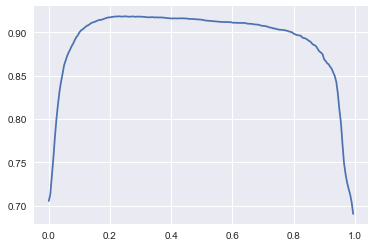

optimal_threshold= 0.25 for which AUC= 0.9185824136238699


In [184]:
auc=[]
thres=[]

for cutoff in np.arange(0,1,0.005):
    y_test_pred=(test_pred_Y_prob[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(test_df_2_Y['actual'],y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print ('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

In [135]:
cutoff = 0.23

pred_prob_labels = (test_pred_Y_prob[:,1]>cutoff).astype('int')

In [136]:
test_submission.head()

,click_id,ip,app,device,os,channel,click_time,a_hour
0,0,5744,9,1,3,107,4,4
1,1,119901,9,1,3,466,4,4
2,2,72287,21,1,19,128,4,4
3,3,78477,15,1,13,111,4,4
4,4,123080,12,1,13,328,4,4


In [138]:
test_submission['is_attributed'] = pred_prob_labels

In [168]:
test_submission.is_attributed.value_counts()/len(test_submission)

0    0.957461
1    0.042539
Name: is_attributed, dtype: float64

In [141]:
test_submission_final = test_submission[['click_id','is_attributed']]

In [142]:
test_submission_final.to_csv('submission.csv', index=False)

In [127]:
print (metrics.roc_auc_score(test_df_2_Y['actual'],pred_prob_labels))

0.9187207833064738


In [ ]:
print ("Initiating (Grid) grid-search for ", grid_search_RF, grid_search_RF.fit(train_data, train_Y['actual'] ))

    # Generate a report
#print "REPORT ON RANDOM SEARCH CV FOR RANDOM FOREST MODEL WITH ", ":\n"
#report(random_search_RF.grid_scores_)

#print "REPORT ON Grid SEARCH CV FOR RANDOM FOREST MODEL WITH ", ":\n"
#report(grid_search_RF.grid_scores_)

In [ ]:
train_pred_Y = grid_search_RF.predict(train_data)

In [ ]:
train_pred_Y_prob = grid_search_RF.predict_proba(train_data)

In [123]:
max(test_pred_Y_prob[:,1])

1.0

In [ ]:
grid_search_RF.best_params_

In [208]:
import xgboost as xgb

In [209]:
xgb_clf = xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
xgb_clf.fe

In [212]:
xgb_clf.fit(train_df_2, train_df_2_Y['actual'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [186]:
pred=xgb_clf.predict(test_df_2)

/Users/akshaysharma/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [187]:
print (metrics.roc_auc_score(test_df_2_Y['actual'],pred))

0.914989706775241


In [188]:
print (metrics.classification_report(test_df_2_Y['actual'],pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99   1995078
          1       0.15      0.84      0.26      4922

avg / total       1.00      0.99      0.99   2000000



In [158]:
test_pred_Y_prob = xgb_clf.predict_proba(test_sub_2)

In [164]:
cutoff = 0.2

pred_prob_labels = (test_pred_Y_prob[:,1]>cutoff).astype('int')

In [213]:
train_pred_Y_prob=xgb_clf.predict_proba(train_df_2)

In [214]:
test_pred_Y_prob=xgb_clf.predict_proba(test_df_2)

In [165]:
test_submission['is_attributed'] = pred_prob_labels

In [166]:
test_submission_final = test_submission[['click_id','is_attributed']]

In [167]:
test_submission_final.to_csv('submission_2.csv', index=False)

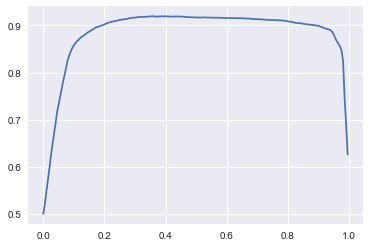

optimal_threshold= 0.4 for which AUC= 0.9196358961255522


In [215]:
auc=[]
thres=[]

for cutoff in np.arange(0,1,0.005):
    y_test_pred=(test_pred_Y_prob[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(test_df_2_Y['actual'],y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print ('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

In [216]:
cutoff = 0.4

pred_prob_labels = (test_pred_Y_prob[:,1]>cutoff).astype('int')

In [217]:
print (metrics.classification_report(test_df_2_Y['actual'],pred_prob_labels))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98   2992734
          1       0.06      0.87      0.11      7266

avg / total       1.00      0.97      0.98   3000000

